<a href="https://colab.research.google.com/github/JraHike76/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Jay_Adamo_Define_ML_Problems_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [52]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/JraHike76/Build-Week-Unit-2/master/Seattle_Air%20BnB_Reviews_2016.csv')

print(df.shape)
df

(3818, 20)


,id,last_scraped,name,host_is_superhost,street,neighbourhood_group_cleansed,location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,review_scores_rating,cancellation_policy
0,241032,2016-01-04,Stylish Queen Anne Apartment,f,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,NaN,$85.00,1,95.0,moderate
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,NaN,$150.00,2,96.0,strict
2,3308979,2016-01-04,New Modern House-Amazing water view,f,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,NaN,$975.00,4,97.0,strict
3,7421966,2016-01-04,Queen Anne Chateau,f,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,NaN,$100.00,1,NaN,flexible
4,278830,2016-01-04,Charming craftsman 3 bdm house,f,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,NaN,$450.00,1,92.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2016-01-04,3BR Mountain View House in Seattle,f,"Northwest 48th Street, Seattle, WA 98107, Unit...",Other neighborhoods,"Seattle, WA",47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,3.0,NaN,$359.00,3,80.0,strict
3814,8902327,2016-01-04,Portage Bay View!-One Bedroom Apt,f,"Fuhrman Avenue East, Seattle, WA 98102, United...",Capitol Hill,"Seattle, WA",47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,2.0,NaN,$79.00,2,100.0,moderate
3815,10267360,2016-01-04,Private apartment view of Lake WA,f,"South Laurel Street, Seattle, WA 98178, United...",Rainier Valley,"Seattle, WA",47.508453,-122.240607,House,Entire home/apt,2,1.0,1.0,1.0,NaN,$93.00,1,NaN,moderate
3816,9604740,2016-01-04,Amazing View with Modern Comfort!,f,"43rd Avenue East, Seattle, WA 98112, United St...",Capitol Hill,"Seattle, WA",47.632335,-122.275530,Condominium,Entire home/apt,2,1.0,0.0,1.0,NaN,$99.00,3,NaN,moderate


In [53]:
df.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,minimum_nights,review_scores_rating
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3171.000000
mean,5.550111e+06,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,2.369303,94.539262
std,2.962660e+06,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,16.305902,6.606083
min,3.335000e+03,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000
25%,3.258256e+06,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,93.000000
50%,6.118244e+06,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,2.000000,96.000000
75%,8.035127e+06,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,99.000000
max,1.034016e+07,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,100.000000


In [54]:
df.describe(exclude='number')

,last_scraped,name,host_is_superhost,street,neighbourhood_group_cleansed,location,property_type,room_type,price,cancellation_policy
count,3818,3818,3816,3818,3818,3818,3817,3818,3818,3818
unique,1,3792,2,1442,17,7,16,3,273,3
top,2016-01-04,Capitol Hill Apartment,f,"1st Avenue, Seattle, WA 98101, United States",Other neighborhoods,"Seattle, WA",House,Entire home/apt,$150.00,strict
freq,3818,3,3038,30,794,3810,1733,2541,162,1417


Choose your target. Which column in your tabular dataset will you predict?
Is your problem regression or classification?


In [55]:
df.columns

Index(['id', 'last_scraped', 'name', 'host_is_superhost', 'street',
       'neighbourhood_group_cleansed', 'location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'minimum_nights',
       'review_scores_rating', 'cancellation_policy'],
      dtype='object')

In [56]:
# checking out 'review_scores_rating'

df['review_scores_rating'].describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

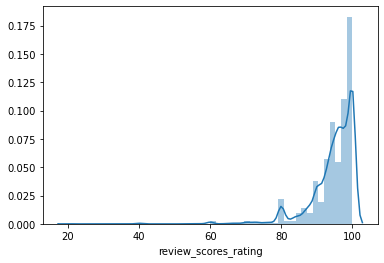

In [57]:
#Creating a visual for 'review_scores_rating'

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['review_scores_rating']);

In [0]:
# Need something binary, yes or no, good or not... from all this categorical data
# I will base my target on the ratings which have been converted into percentages from a 1-10 scale

In [59]:
# Engineer feature 'recommended' based on percents from 'review_scores_rating'

df['recommended'] = df['review_scores_rating'] >= 95

df['recommended'].describe()

count     3818
unique       2
top       True
freq      2023
Name: recommended, dtype: object

In [60]:
# Drop all nulls from new subset

df = df.dropna(subset = ['review_scores_rating'])

df['recommended'].describe()

count     3171
unique       2
top       True
freq      2023
Name: recommended, dtype: object

How is your target distributed? 

* Classification: How many classes? Are the classes imbalanced?
    

In [61]:
# Now I have a highly recommended column with True and False values,
#  and I want to recommend based on these classes,
#  so this is a classification problem

df['recommended'].value_counts(normalize=True)

True     0.637969
False    0.362031
Name: recommended, dtype: float64

In [62]:
#looking at dataframe to see new feature

df.head()

,id,last_scraped,name,host_is_superhost,street,neighbourhood_group_cleansed,location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,review_scores_rating,cancellation_policy,recommended
0,241032,2016-01-04,Stylish Queen Anne Apartment,f,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,NaN,$85.00,1,95.0,moderate,True
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,NaN,$150.00,2,96.0,strict,True
2,3308979,2016-01-04,New Modern House-Amazing water view,f,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,NaN,$975.00,4,97.0,strict,True
4,278830,2016-01-04,Charming craftsman 3 bdm house,f,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,NaN,$450.00,1,92.0,strict,False
5,5956968,2016-01-04,Private unit in a 1920s mansion,f,"West Comstock Street, Seattle, WA 98119, Unite...",Queen Anne,"Seattle, WA",47.630525,-122.366174,House,Private room,2,1.0,1.0,1.0,NaN,$120.00,1,95.0,strict,True


Choose your evaluation metric(s).
* Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. 
* What evaluation metric will you choose, in addition to or instead of accuracy?
    

In [0]:
# the True class actually falls in between the accuracy spectrum of 50-70%

# In addition to accuracy I may 

- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

In [65]:
df.describe(include='all')

,id,last_scraped,name,host_is_superhost,street,neighbourhood_group_cleansed,location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,minimum_nights,review_scores_rating,cancellation_policy,recommended
count,3.171000e+03,3171,3171,3171,3171,3171,3171,3171.000000,3171.000000,3171,3171,3171.000000,3159.000000,3165.000000,3171.000000,91.000000,3171,3171.000000,3171.000000,3171,3171
unique,NaN,1,3153,2,1306,17,6,NaN,NaN,16,3,NaN,NaN,NaN,NaN,NaN,260,NaN,NaN,3,2
top,NaN,2016-01-04,Secluded Setting in North Seattle,f,"Hubbell Place, Seattle, WA 98101, United States",Other neighborhoods,"Seattle, WA",NaN,NaN,House,Entire home/apt,NaN,NaN,NaN,NaN,NaN,$150.00,NaN,NaN,strict,True
freq,NaN,3171,2,2420,27,656,3164,NaN,NaN,1460,2125,NaN,NaN,NaN,NaN,NaN,130,NaN,NaN,1257,2023
mean,5.017752e+06,NaN,NaN,NaN,NaN,NaN,NaN,47.628684,-122.332870,NaN,NaN,3.384421,1.258943,1.302686,1.742353,809.043956,NaN,2.395774,94.539262,NaN,NaN
std,2.801376e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.042962,0.031571,NaN,NaN,1.991495,0.594381,0.874565,1.154951,637.369732,NaN,17.850468,6.606083,NaN,NaN
min,4.291000e+03,NaN,NaN,NaN,NaN,NaN,NaN,47.505088,-122.417219,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,1.000000,20.000000,NaN,NaN
25%,2.694596e+06,NaN,NaN,NaN,NaN,NaN,NaN,47.608762,-122.353981,NaN,NaN,2.000000,1.000000,1.000000,1.000000,375.000000,NaN,1.000000,93.000000,NaN,NaN
50%,5.289293e+06,NaN,NaN,NaN,NaN,NaN,NaN,47.623076,-122.328980,NaN,NaN,3.000000,1.000000,1.000000,1.000000,730.000000,NaN,2.000000,96.000000,NaN,NaN
75%,7.454547e+06,NaN,NaN,NaN,NaN,NaN,NaN,47.662419,-122.310570,NaN,NaN,4.000000,1.000000,2.000000,2.000000,1200.000000,NaN,2.000000,99.000000,NaN,NaN


In [0]:
# when looking at the min and max of the columns there soesn't appear to be any outliers

In [0]:
# I will do a random train/val/test


- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [64]:
df.columns

Index(['id', 'last_scraped', 'name', 'host_is_superhost', 'street',
       'neighbourhood_group_cleansed', 'location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'minimum_nights',
       'review_scores_rating', 'cancellation_policy', 'recommended'],
      dtype='object')

In [0]:
# i will drop any column with no signaficance or a single unique identifier
#  and features with high cardinality because they could cause leakage